In [1]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.signal import windows, oaconvolve

In [2]:
import sys
from os import path

code_path = path.abspath(path.join('..','..','diss3_code','midi'))
print(code_path, path.exists(code_path))

sys.path.append(code_path)
import midi_utils as mu

/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/diss3_code/midi True


In [3]:
midi_paths = ['MIDI-Freestyle', 'MIDI-Interaction']
midi_paths = [path.abspath(path.join('..','..','..','data',p)) for p in midi_paths]
print([path.exists(p) for p in midi_paths])

[True, True]


In [4]:
midi_files = sum([glob.glob(path.join(mp,'*.mid')) for mp in midi_paths],[] )

In [5]:
midi_files[-5:]

['/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1025.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1026.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1031.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1027.mid',
 '/home/siegman/Documents/Shahar/BarIlan/Dissertation3/data/MIDI-Interaction/Interaction_1046.mid']

In [6]:
def populate_music_dictionary(midi_files):
    all_ticks = {}
    for mf in midi_files:
        group_num = path.basename(mf).split('_')[1].split('.')[0]
        session = path.basename(mf).split('_')[0]
        group_ticks = mu.get_drumbeat_ticks_for_midi(mf)
        for track, ticks in group_ticks.items():
            print((group_num, session, track))
            assert (group_num, session, track) not in all_ticks
            all_ticks[(group_num, session, track)]= [t[0] for t in ticks if t[1]-t[0]>10] 
    return all_ticks

In [7]:
all_ticks=populate_music_dictionary(midi_files)

('1009', 'Freestyle', 43)
('1009', 'Freestyle', 45)
('1009', 'Freestyle', 48)
('1025', 'Freestyle', 43)
('1025', 'Freestyle', 48)
('1025', 'Freestyle', 45)
('1021', 'Freestyle', 45)
('1021', 'Freestyle', 48)
('1021', 'Freestyle', 43)
('1018', 'Freestyle', 43)
('1018', 'Freestyle', 48)
('1018', 'Freestyle', 45)
('1008', 'Freestyle', 48)
('1008', 'Freestyle', 45)
('1008', 'Freestyle', 43)
('1048', 'Freestyle', 45)
('1048', 'Freestyle', 43)
('1048', 'Freestyle', 48)
('1026', 'Freestyle', 43)
('1026', 'Freestyle', 45)
('1026', 'Freestyle', 48)
('1024', 'Freestyle', 43)
('1024', 'Freestyle', 48)
('1024', 'Freestyle', 45)
('1023', 'Freestyle', 48)
('1023', 'Freestyle', 43)
('1023', 'Freestyle', 45)
('1033', 'Freestyle', 45)
('1033', 'Freestyle', 43)
('1033', 'Freestyle', 48)
('1045', 'Freestyle', 48)
('1045', 'Freestyle', 43)
('1045', 'Freestyle', 45)
('1034', 'Freestyle', 45)
('1034', 'Freestyle', 48)
('1034', 'Freestyle', 43)
('1046', 'Freestyle', 48)
('1046', 'Freestyle', 45)
('1046', 'Fr

In [19]:
groups = set([a[0] for a in all_ticks.keys()])

d1, d2, d3 = {}, {}, {}

for k, v in all_ticks.items():
    if len(v)> 10:
        d1[(k[0],k[1])] = d1.get((k[0],k[1]),[])+[v[0]] # time of first beat
        d2[(k[0],k[1])] = d2.get((k[0],k[1]),[])+[v[-4]] # time of last beat
        d3[(k[0],k[1])] = d2.get((k[0],k[1]),[])+[v[-4]-v[0]] #length of active area
    
#d1[('1005', 'Interaction')]= d1[('1005', 'Interaction')][:-1]
#d2[('1005', 'Interaction')]= d2[('1005', 'Interaction')][:-1]
#d3[('1005', 'Interaction')]= d3[('1005', 'Interaction')][:-1]


In [20]:
d2[('1005', 'Interaction')]

[50963, 51072, 50746]

In [21]:
from collections import Counter
Counter(len(v) for v  in d2.values())

Counter({3: 99})

### Time of first beat for players by group

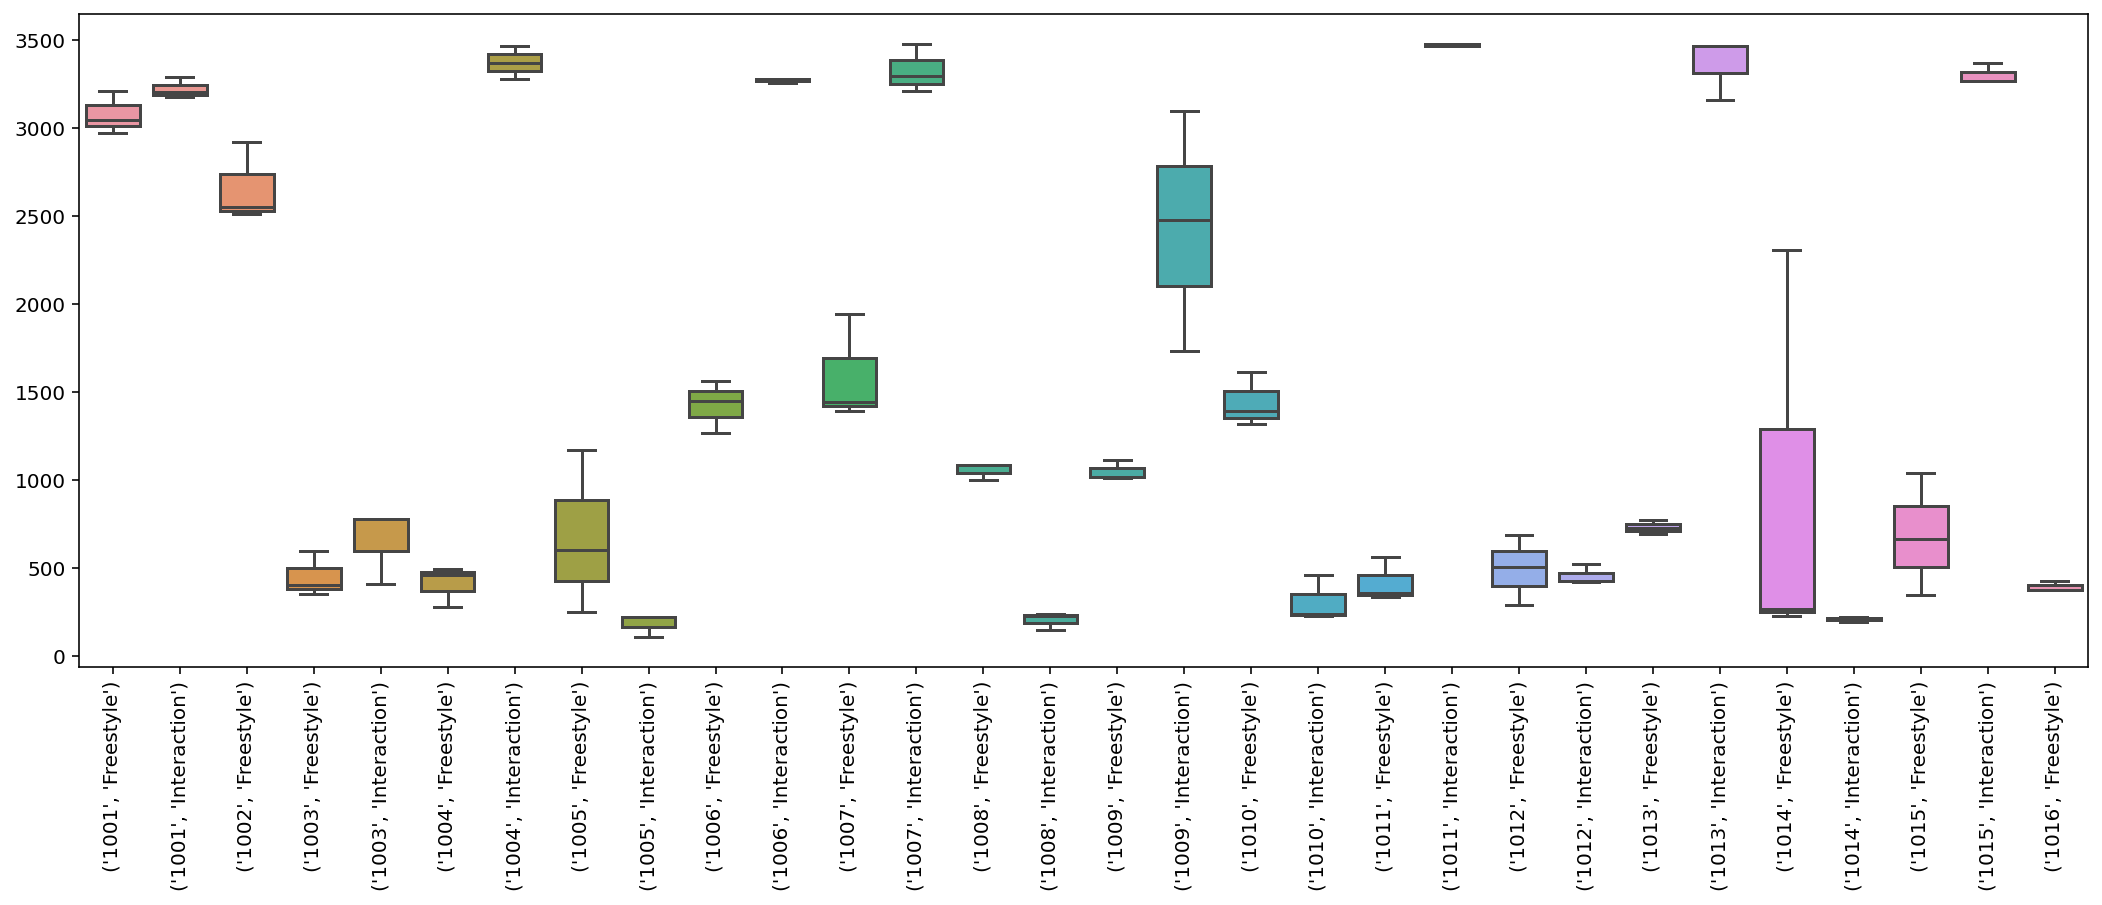

In [22]:
dd=pd.DataFrame(d1)

dd=dd[sorted(dd.columns)].iloc[:,:30]
plt.figure(figsize=(18,6))
g=sns.boxplot(data=dd)
g.set_xticklabels(labels = dd.columns,rotation=90);

### Time of last beat for players by group

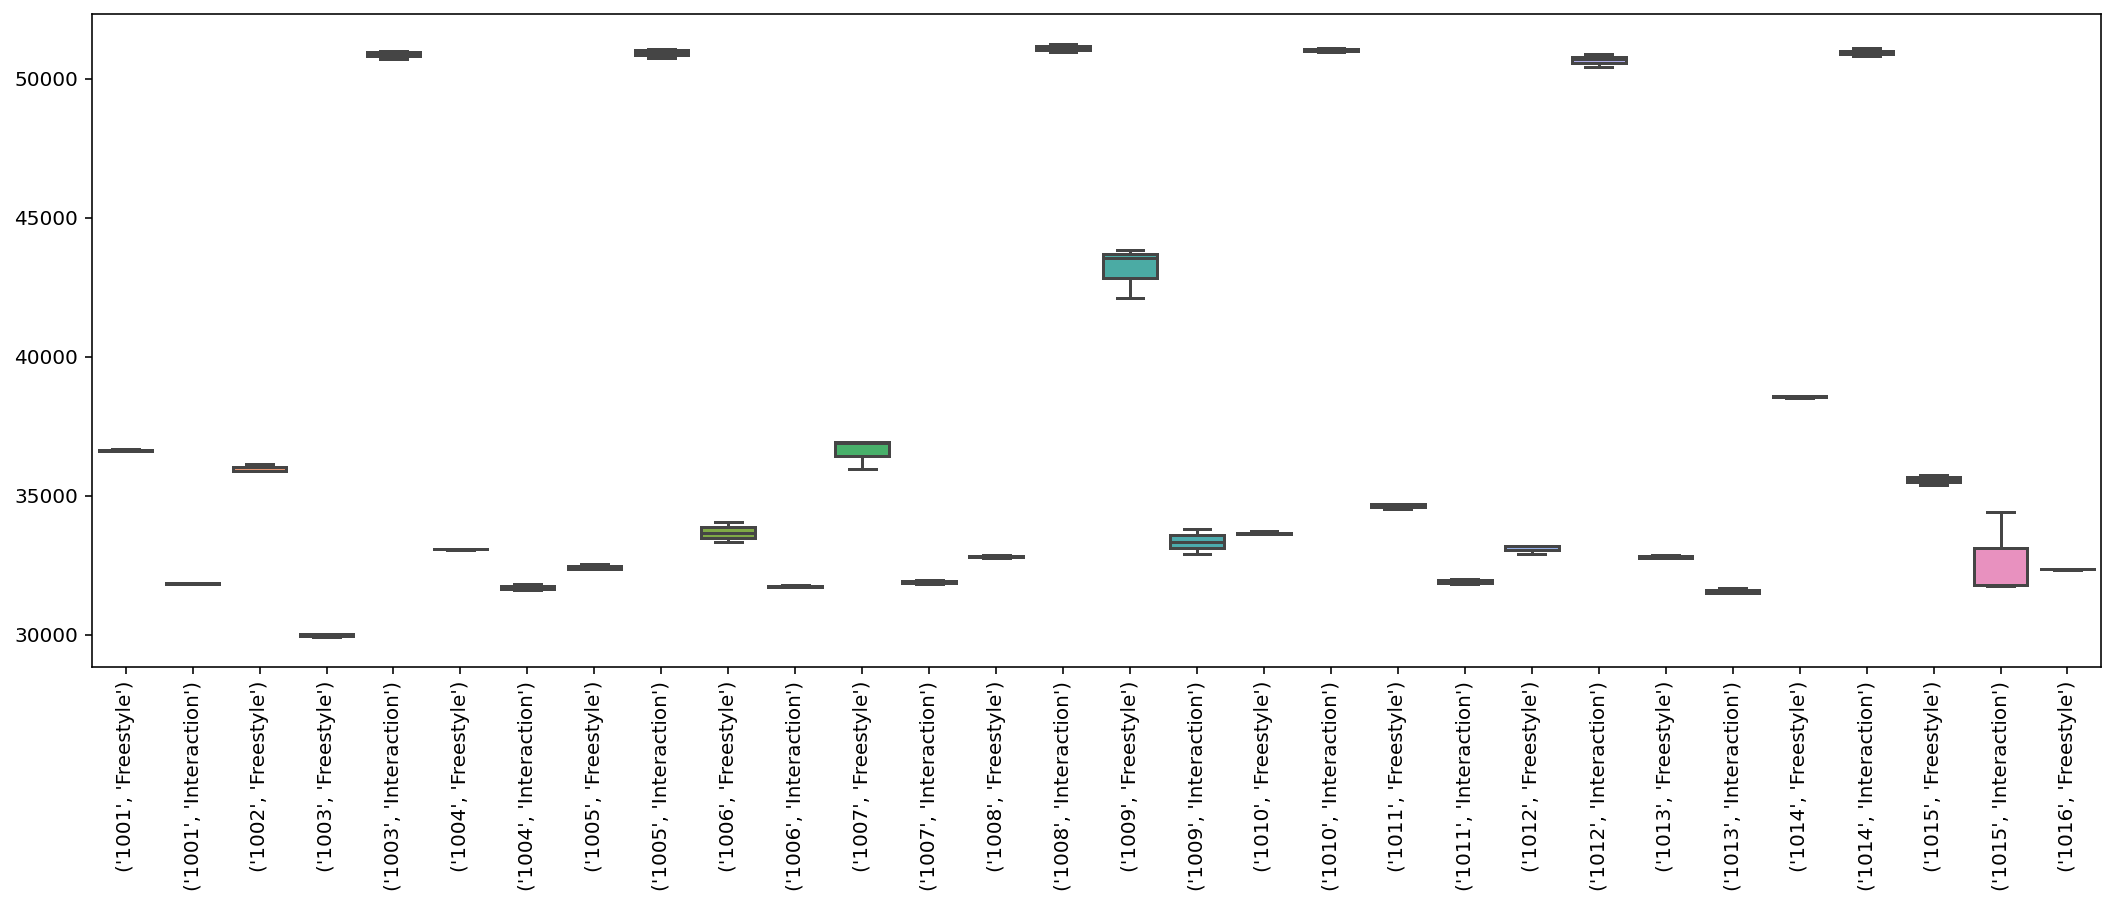

In [23]:
dd=pd.DataFrame(d2)

dd=dd[sorted(dd.columns)].iloc[:,:30]
plt.figure(figsize=(18,6))
g=sns.boxplot(data=dd)
g.set_xticklabels(labels = dd.columns,rotation=90);

### Interval of first to last beat by group

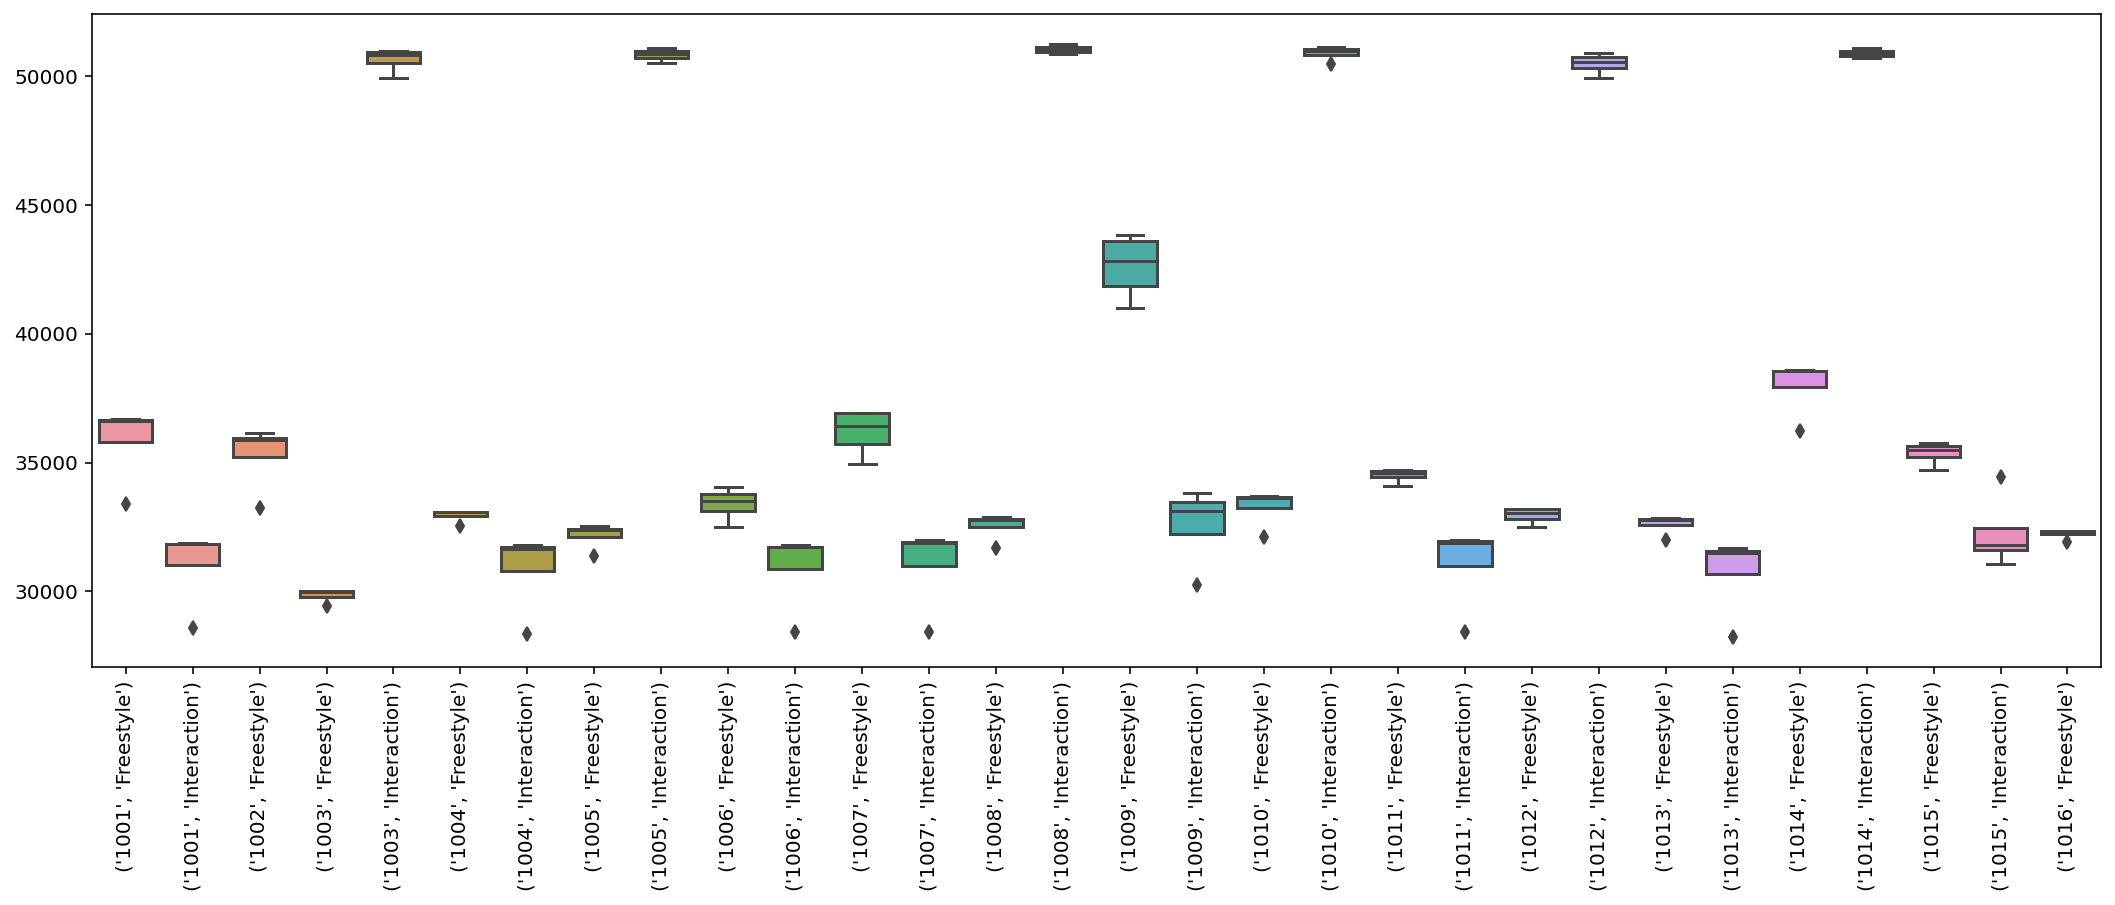

In [24]:
dd=pd.DataFrame(d3)

dd=dd[sorted(dd.columns)].iloc[:,:30]
plt.figure(figsize=(18,6))
g=sns.boxplot(data=dd)
g.set_xticklabels(labels = dd.columns,rotation=90);

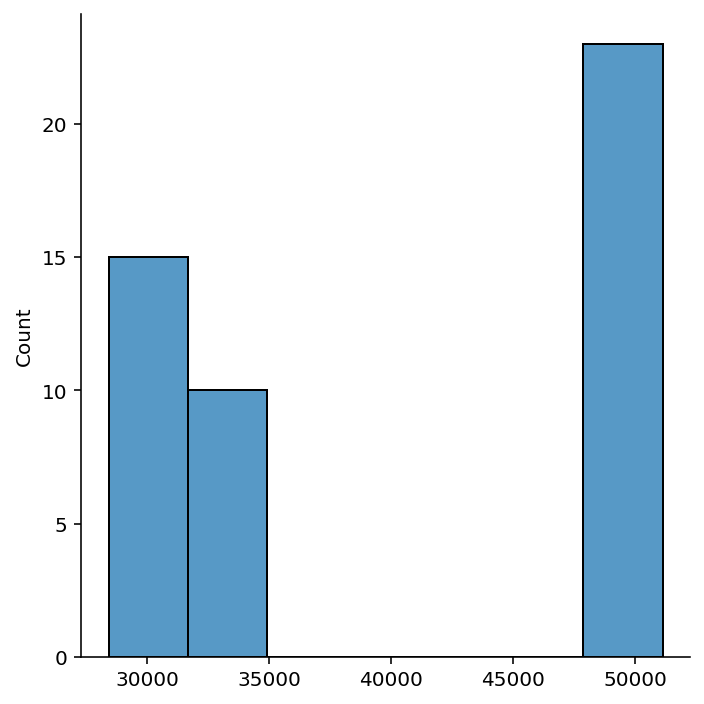

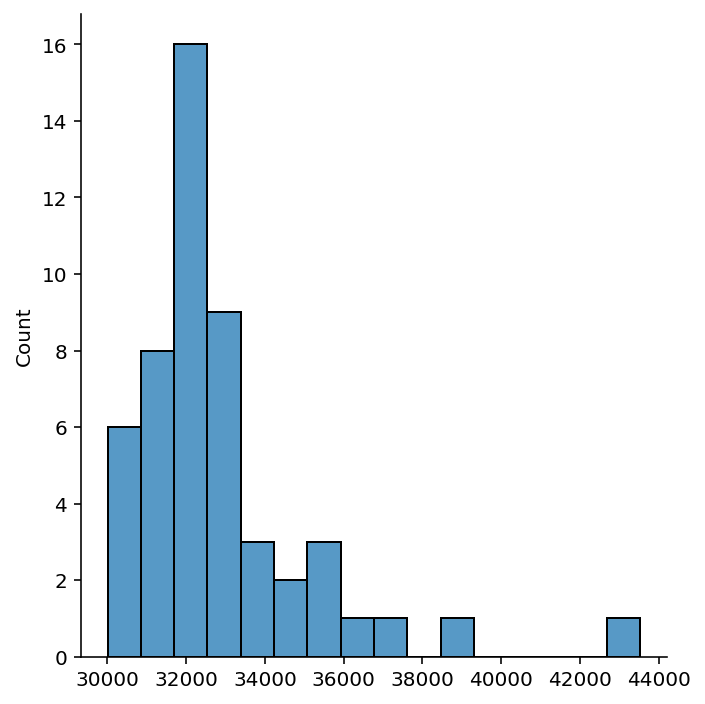

In [26]:
dd2 = pd.DataFrame(d2)
dd2.columns = pd.MultiIndex.from_tuples(dd2.columns)
sns.displot(dd2.xs('Interaction',level=1,axis=1).median())
sns.displot(dd2.xs('Freestyle',level=1,axis=1).median())

In [29]:
print([f'{k}: {len(v)}' for k, v in all_ticks.items()])

["('1009', 'Freestyle', 43): 616", "('1009', 'Freestyle', 45): 745", "('1009', 'Freestyle', 48): 502", "('1025', 'Freestyle', 43): 453", "('1025', 'Freestyle', 48): 470", "('1025', 'Freestyle', 45): 692", "('1021', 'Freestyle', 45): 670", "('1021', 'Freestyle', 48): 752", "('1021', 'Freestyle', 43): 740", "('1018', 'Freestyle', 43): 590", "('1018', 'Freestyle', 48): 648", "('1018', 'Freestyle', 45): 730", "('1008', 'Freestyle', 48): 663", "('1008', 'Freestyle', 45): 641", "('1008', 'Freestyle', 43): 642", "('1048', 'Freestyle', 45): 660", "('1048', 'Freestyle', 43): 644", "('1048', 'Freestyle', 48): 644", "('1026', 'Freestyle', 43): 196", "('1026', 'Freestyle', 45): 156", "('1026', 'Freestyle', 48): 150", "('1024', 'Freestyle', 43): 156", "('1024', 'Freestyle', 48): 175", "('1024', 'Freestyle', 45): 83", "('1023', 'Freestyle', 48): 711", "('1023', 'Freestyle', 43): 853", "('1023', 'Freestyle', 45): 805", "('1033', 'Freestyle', 45): 362", "('1033', 'Freestyle', 43): 414", "('1033', 'Fre

In [42]:
tick_freq = np.array([len(v)/v[-1] for v in all_ticks.values()])

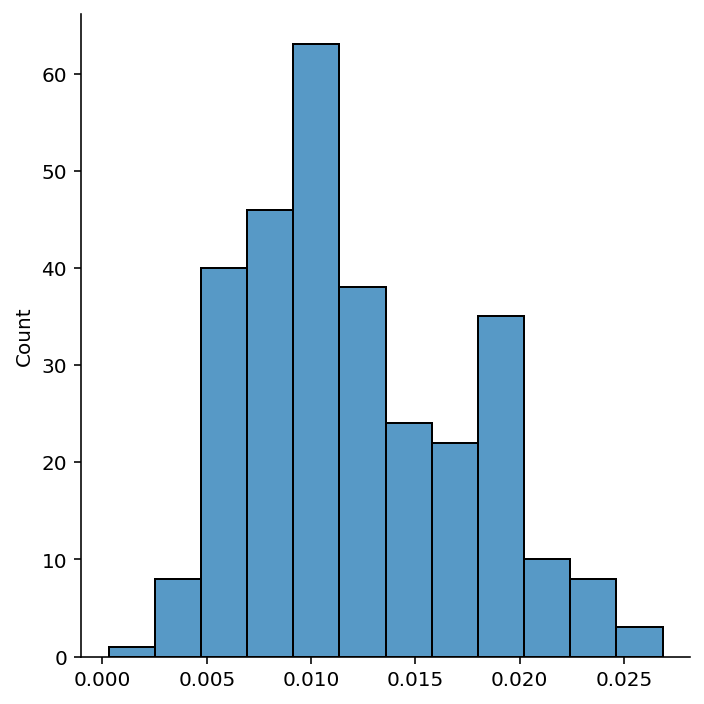

In [43]:
sns.displot(tick_freq)

In [44]:
[(len(v),v[-1]) for v in all_ticks.values()]

[(616, 43711),
 (745, 45246),
 (502, 42278),
 (453, 32351),
 (470, 32410),
 (692, 32462),
 (670, 31388),
 (752, 31871),
 (740, 31435),
 (590, 33969),
 (648, 33964),
 (730, 34355),
 (663, 33007),
 (641, 32922),
 (642, 32920),
 (660, 32839),
 (644, 32782),
 (644, 32750),
 (196, 31966),
 (156, 31552),
 (150, 31200),
 (156, 31438),
 (175, 31468),
 (83, 31799),
 (711, 31826),
 (853, 31772),
 (805, 31739),
 (362, 32643),
 (414, 32500),
 (351, 33042),
 (639, 32437),
 (644, 32335),
 (664, 32401),
 (727, 31953),
 (534, 31873),
 (413, 31980),
 (761, 32550),
 (463, 32005),
 (705, 32094),
 (416, 32171),
 (410, 32175),
 (297, 32177),
 (625, 31595),
 (605, 32009),
 (529, 32305),
 (312, 32805),
 (492, 33247),
 (520, 33110),
 (642, 32425),
 (616, 32419),
 (606, 32368),
 (853, 38653),
 (715, 38652),
 (606, 38650),
 (562, 36183),
 (563, 36425),
 (503, 36517),
 (822, 32460),
 (654, 32504),
 (769, 32813),
 (672, 31702),
 (516, 31655),
 (471, 31571),
 (526, 33398),
 (556, 33399),
 (635, 33081),
 (505, 3091

In [48]:
from collections import Counter
sorted(Counter([len(v)//20*20 for v in all_ticks.values()]).items())

[(0, 1),
 (80, 1),
 (120, 2),
 (140, 4),
 (160, 7),
 (180, 6),
 (200, 6),
 (220, 6),
 (240, 13),
 (260, 16),
 (280, 18),
 (300, 13),
 (320, 10),
 (340, 16),
 (360, 10),
 (380, 6),
 (400, 13),
 (420, 5),
 (440, 10),
 (460, 14),
 (480, 10),
 (500, 13),
 (520, 16),
 (540, 6),
 (560, 8),
 (580, 8),
 (600, 9),
 (620, 9),
 (640, 12),
 (660, 8),
 (680, 4),
 (700, 4),
 (720, 3),
 (740, 4),
 (760, 2),
 (800, 2),
 (820, 1),
 (840, 2)]

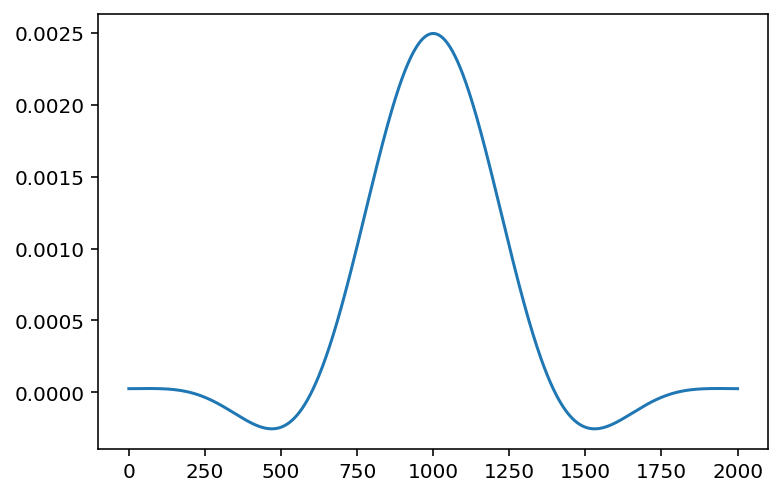

In [100]:
import scipy.signal as signal

#h_kaiser = windows.kaiser(2001,1)
h_kaiser2 = signal.firwin(2001,0.0025)
plt.plot(h_kaiser2)



/home/siegman/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


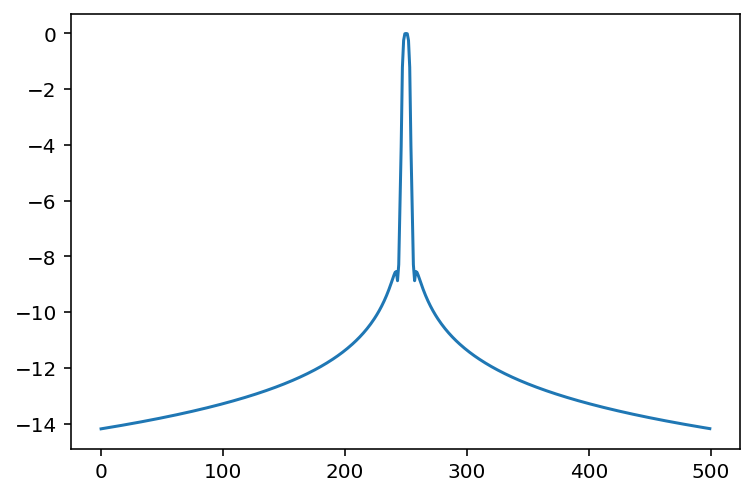

In [115]:
from numpy.fft import fft, fftshift
plt.plot(np.log10(fftshift(fft(h_kaiser2)**2))[750:1250])

In [27]:
def to_dense(t,max_len=None):
    max_len = max_len or t[-1]
    ret = np.zeros(max_len)
    max_index_to_include = np.sum(t<max_len).astype(int)
    ret[t[:max_index_to_include]]=1.
    return ret

In [28]:
group_len = {}
for k, v in all_ticks.items():
    group_len[k[0]] = max(group_len.get(k[0],0), v[-1])

group_len

{'1009': 45246,
 '1025': 32462,
 '1021': 31871,
 '1018': 69057,
 '1008': 58899,
 '1048': 51267,
 '1026': 51104,
 '1024': 51371,
 '1023': 31826,
 '1033': 33042,
 '1045': 32437,
 '1034': 51184,
 '1046': 51139,
 '1035': 32177,
 '1030': 51509,
 '1031': 33247,
 '1032': 51135,
 '1014': 53882,
 '1002': 36517,
 '1016': 57996,
 '1042': 51158,
 '1013': 33399,
 '1029': 30915,
 '1047': 30986,
 '1050': 51172,
 '1049': 32663,
 '1003': 51187,
 '1004': 33269,
 '1038': 55042,
 '1022': 51178,
 '1015': 36138,
 '1007': 37129,
 '1051': 32366,
 '1044': 52366,
 '1041': 31655,
 '1019': 35848,
 '1010': 53276,
 '1027': 31115,
 '1040': 51125,
 '1011': 34771,
 '1039': 32609,
 '1001': 37377,
 '1005': 51247,
 '1012': 51217,
 '1017': 33006,
 '1006': 35437,
 '1028': 31632,
 '1037': 32227,
 '1036': 51180,
 '1043': 33188,
 '1020': 51162}

In [29]:
filtered = {k: oaconvolve(to_dense(np.array(v), group_len[k[0]]),h_kaiser2) for k,v in all_ticks.items()}

NameError: name 'h_kaiser2' is not defined

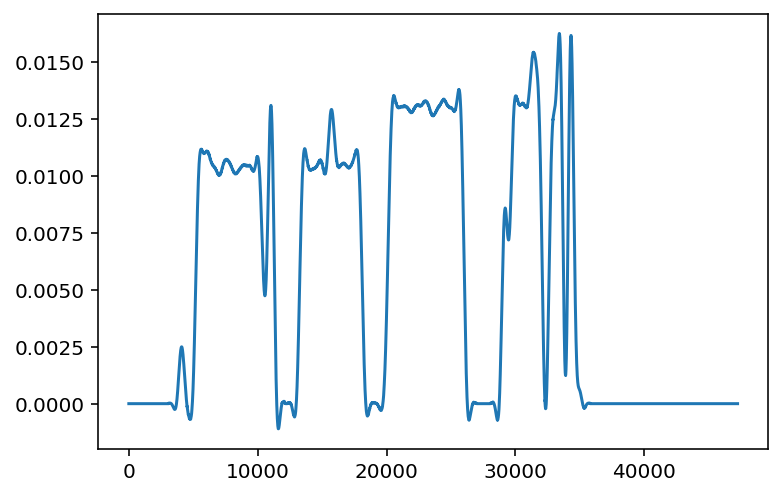

In [107]:
plt.plot(filtered[('1009','Interaction',43)])

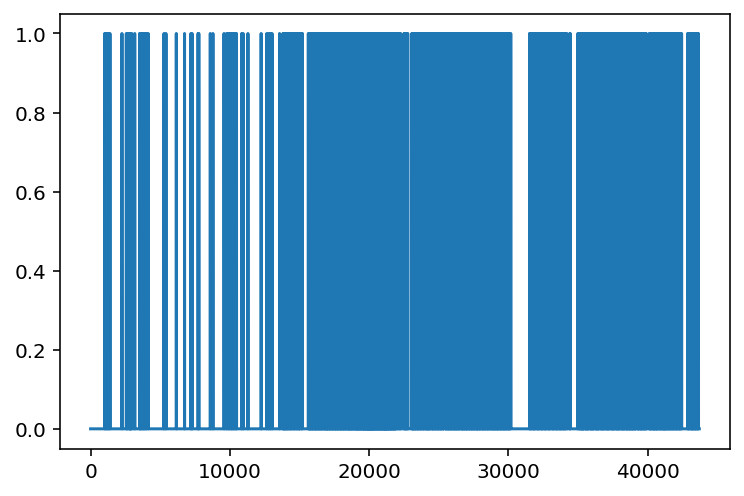

In [109]:
r = to_dense(np.array(all_ticks[('1009','Freestyle',43)]))
r2 = to_dense(np.array(all_ticks[('1009','Interaction',43)]))
r3 = to_dense(np.array(all_ticks[('1010','Interaction',43)]))
plt.plot(r)

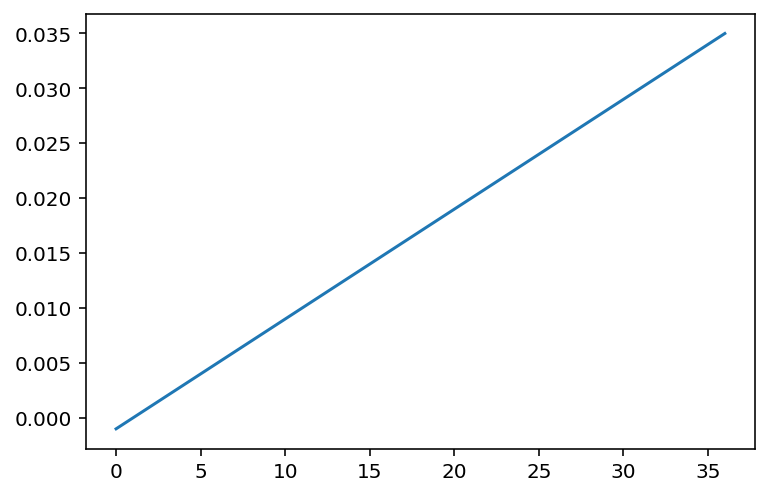

In [110]:
plt.plot(np.unique(oaconvolve(r,h_kaiser2)//1e-3*1e-3))

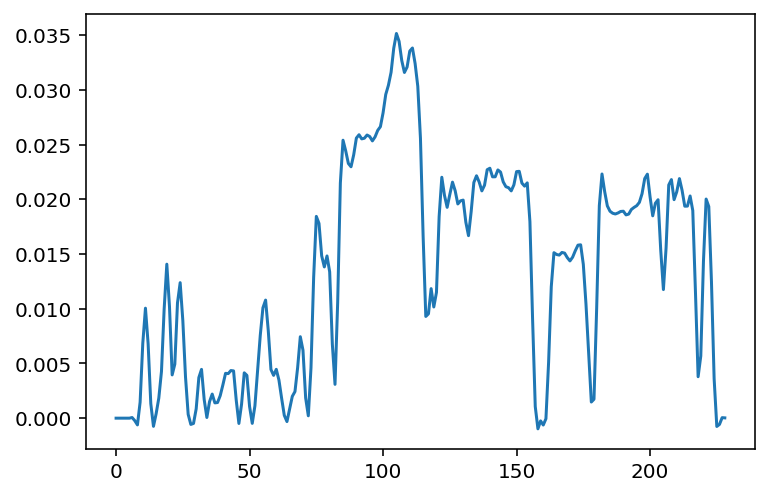

In [111]:
plt.plot(oaconvolve(r,h_kaiser2)[::200])

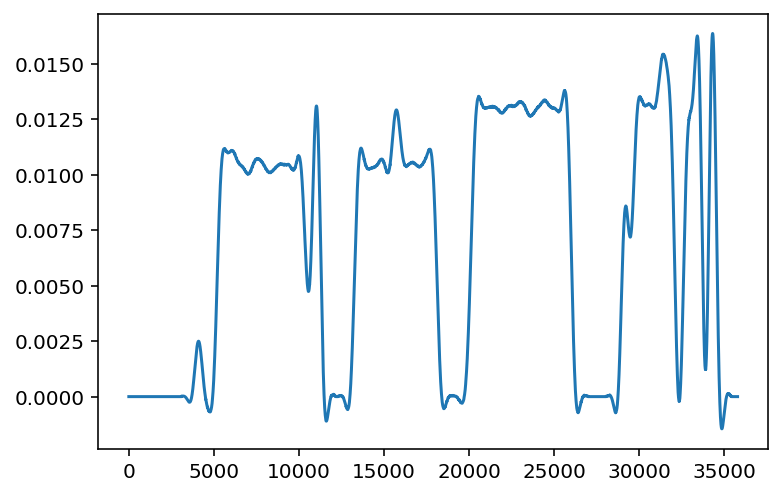

In [112]:
plt.plot(oaconvolve(r2,h_kaiser2))

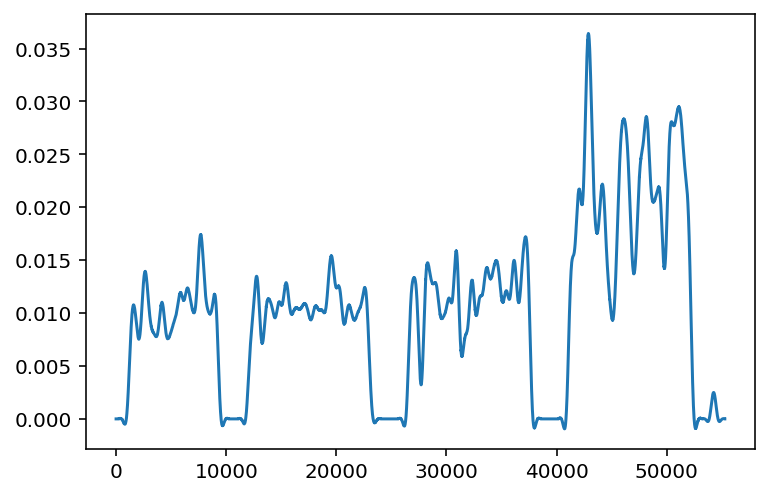

In [113]:
plt.plot(oaconvolve(r3,h_kaiser2))

In [30]:
def get_signals_for_group_session(all_ticks,group,session,kernel):
    arrays = [to_dense(np.array(all_ticks[(group,session,par)])) for par in [43,45,48]]
    arrays = [oaconvolve(t,kernel) for t in arrays]
    la = min([len(a) for a in arrays])
    ret = np.zeros((3,la))
    for i in range(3):
        ret[i,:] =arrays[i][:la]
    return ret

In [31]:
ss = get_signals_for_group_session(all_ticks,'1006','Freestyle',h_kaiser2)
plt.plot(ss.T);

NameError: name 'h_kaiser2' is not defined

In [32]:
# normalized guassian window
ngw = windows.gaussian(2001,200)
ngw = ngw/ngw.sum()

In [33]:
sessions= 'Interaction','Freestyle'

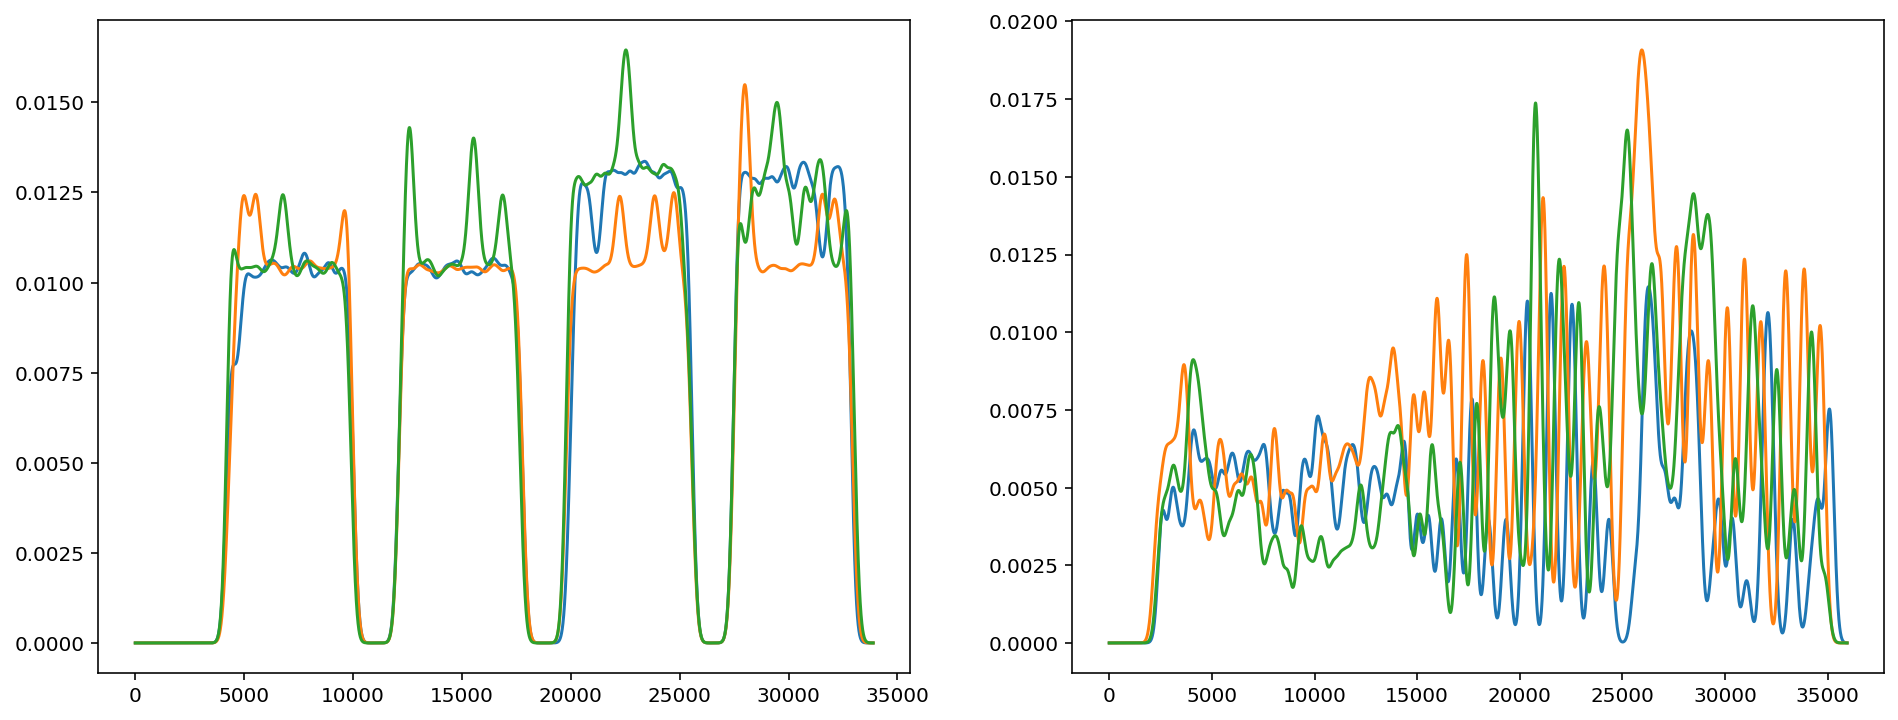

In [70]:
gr = '1006'
ss = [get_signals_for_group_session(all_ticks,gr, sess ,ngw) for sess in sessions]
ss1006 = ss
plt.figure(figsize=(16,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(ss[i].T)


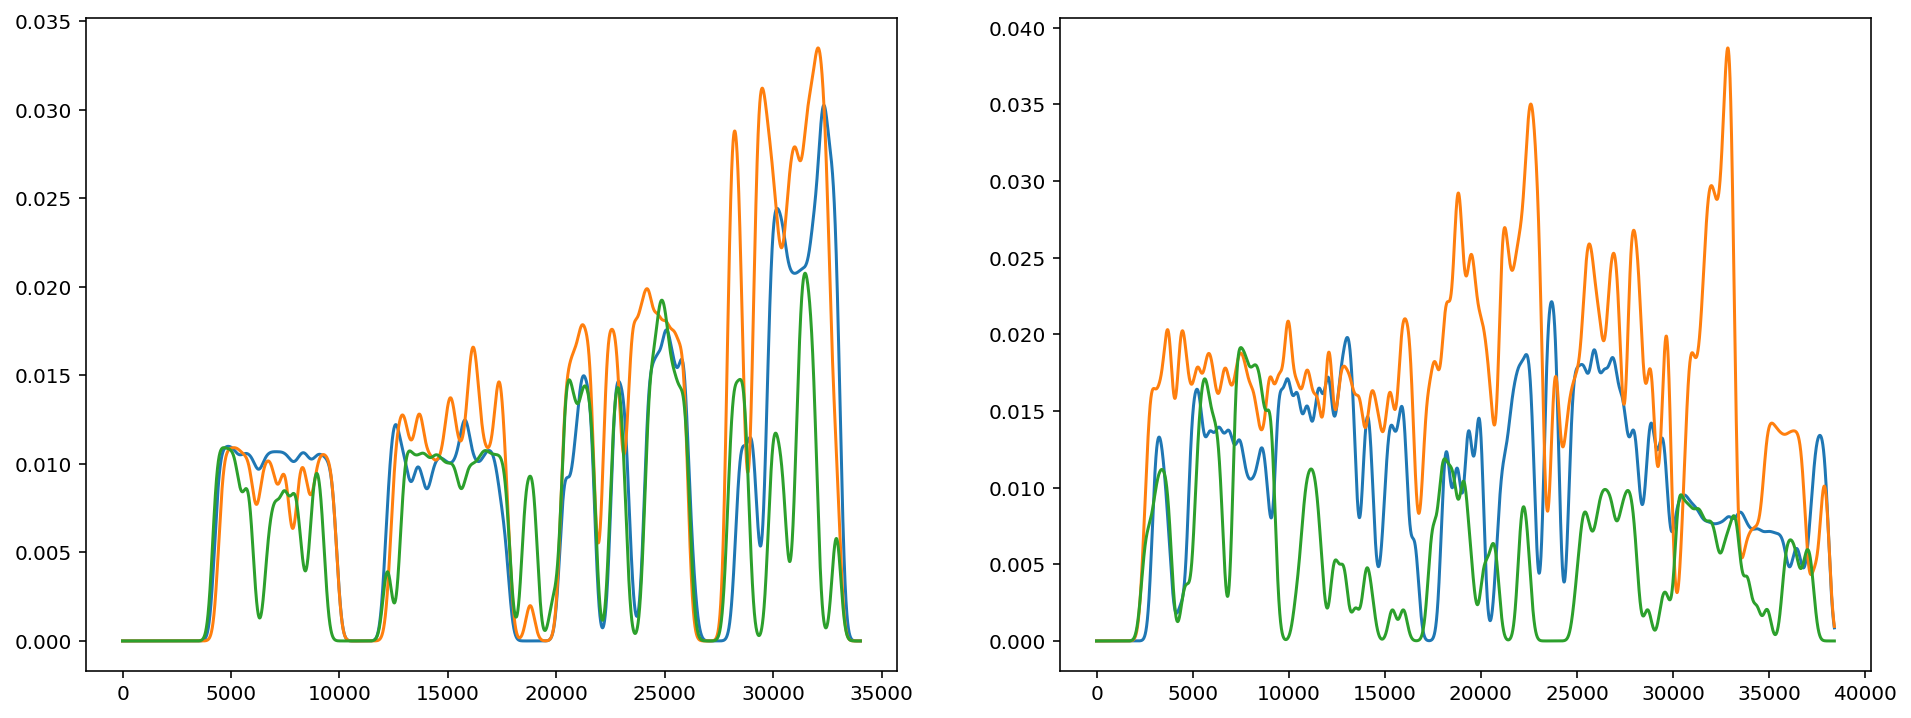

In [35]:
gr = '1007'
ss = [get_signals_for_group_session(all_ticks,gr, sess ,ngw) for sess in sessions]
plt.figure(figsize=(16,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(ss[i].T)


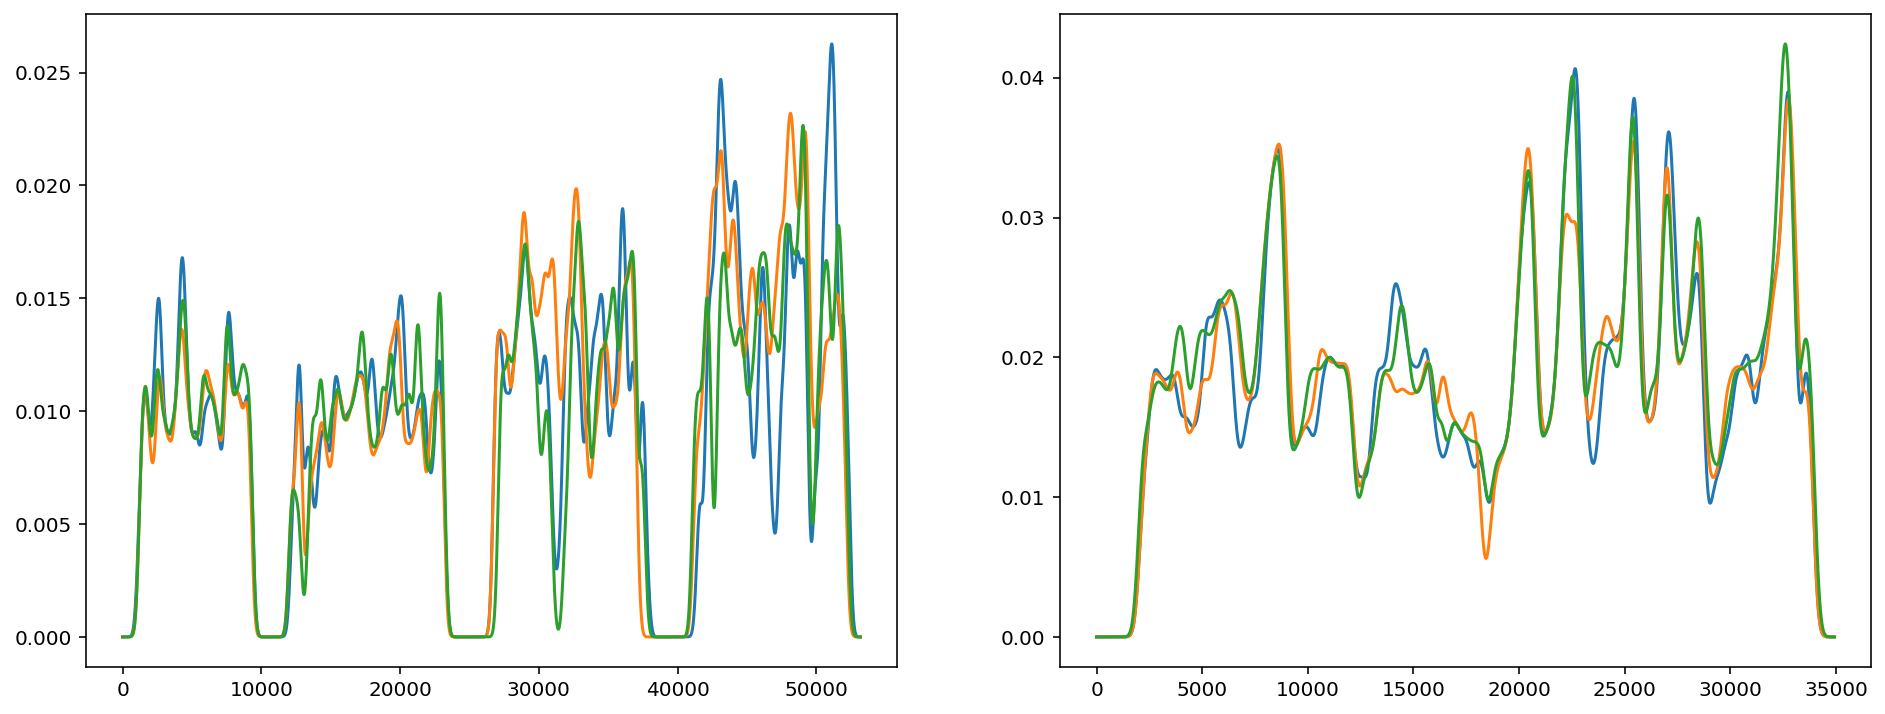

In [73]:
gr = '1008'
ss = [get_signals_for_group_session(all_ticks,gr, sess ,ngw) for sess in sessions]
ss1008 = ss
plt.figure(figsize=(16,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(ss[i].T)


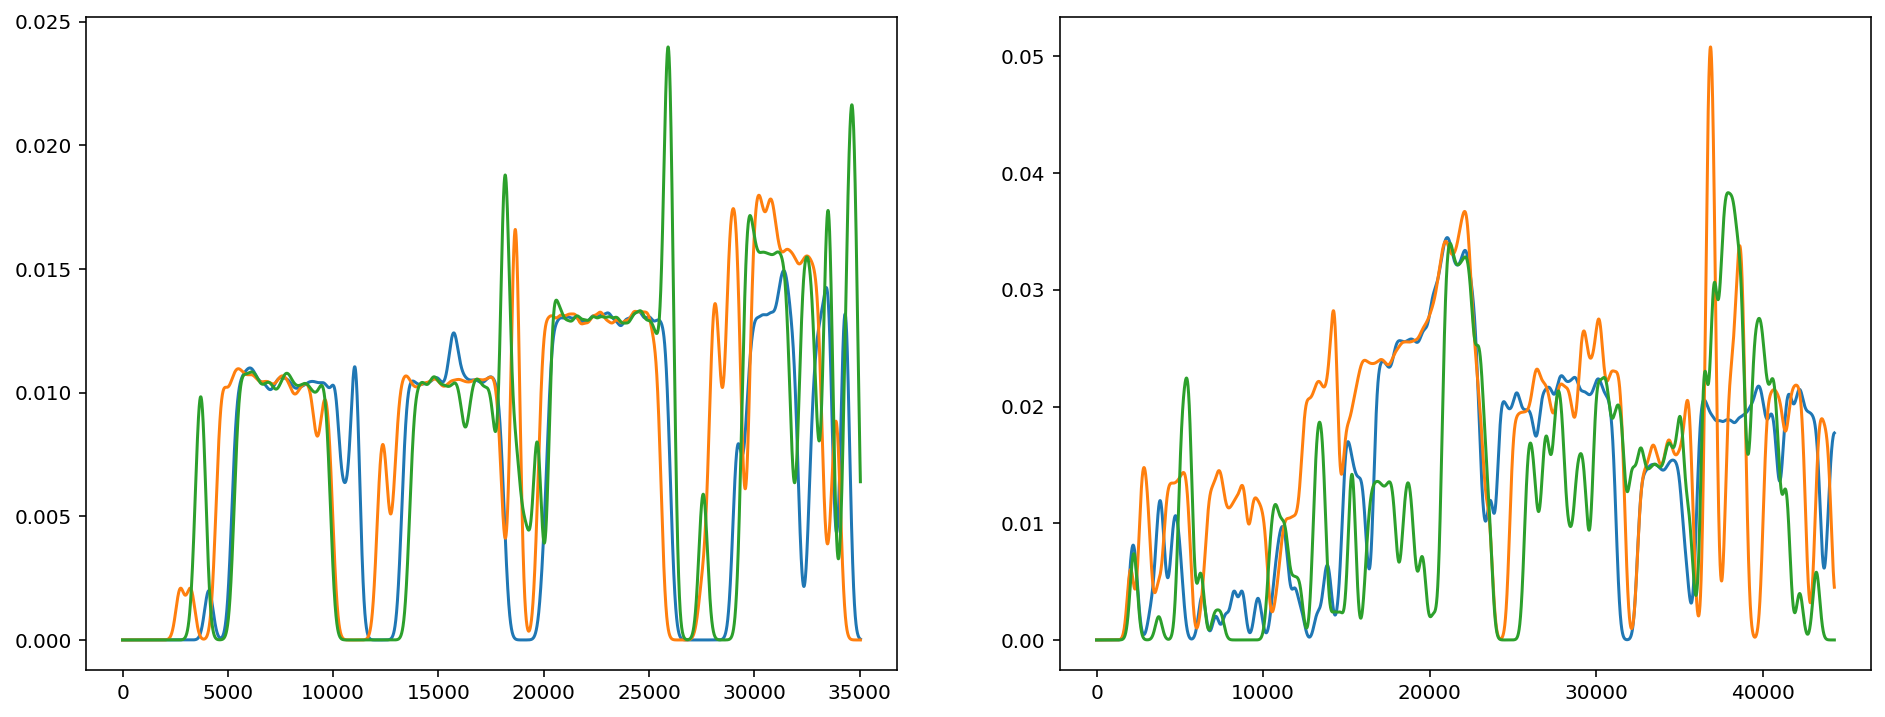

In [63]:
gr = '1009'
ss = [get_signals_for_group_session(all_ticks,gr, sess ,ngw) for sess in sessions]
ss1009  = ss
plt.figure(figsize=(16,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(ss[i].T)


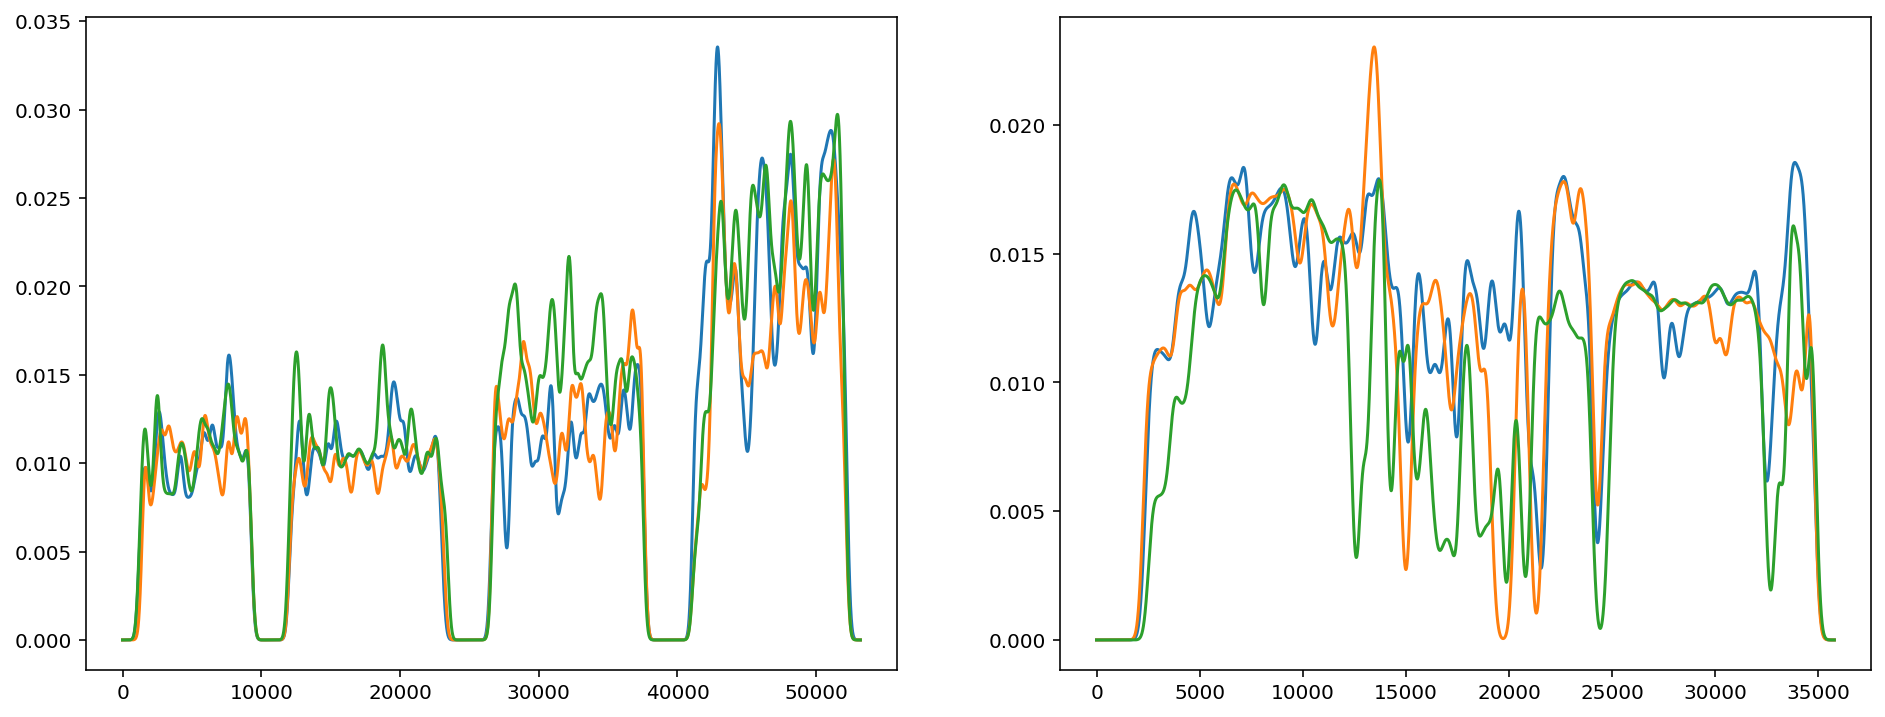

In [41]:
gr = '1010'
ss = [get_signals_for_group_session(all_ticks,gr, sess ,ngw) for sess in sessions]
ss1010=ss
plt.figure(figsize=(16,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(ss[i].T)


In [68]:
ssi = ss1010[0]- 0.005
w=np.ones((3,1)) @ np.arange(ssi.shape[1]-1)[np.newaxis,:]
co = w[np.sign(ssi[:,1:]) != np.sign(ssi[:,:-1])] # cutoffs
co = co.reshape(3,-1)
nn = '\n\n'
print(co,end=nn)
engagement_len =co[:,1::2]-co[:,::2]
print(engagement_len,end=nn)
recess_len = co[:,2::2]-co[:,1:-1:2]
print(recess_len.mean(axis=0),end=nn)
print(np.round(recess_len.mean(axis=0)/engagement_len[:,:-1].mean(axis=0),3))

[[ 1204.  9308. 12074. 23041. 26524. 37685. 41019. 52345.]
 [ 1378.  9323. 12051. 23155. 26551. 37702. 41262. 52215.]
 [ 1185.  9330. 11934. 23406. 26594. 37607. 41276. 52253.]]

[[ 8104. 10967. 11161. 11326.]
 [ 7945. 11104. 11151. 10953.]
 [ 8145. 11472. 11013. 10977.]]

[2699.33333333 3355.66666667 3521.        ]

[0.335 0.3   0.317]


In [72]:
ssi = ss1006[0]- 0.005
w=np.ones((3,1)) @ np.arange(ssi.shape[1]-1)[np.newaxis,:]
co = w[np.sign(ssi[:,1:]) != np.sign(ssi[:,:-1])] # cutoffs
co = co.reshape(3,-1)
nn = '\n\n'
print(co,end=nn)
engagement_len =co[:,1::2]-co[:,::2]
print(engagement_len.mean(axis=0),end=nn)
recess_len = co[:,2::2]-co[:,1:-1:2]
print(recess_len.mean(axis=0),end=nn)
print(np.round(recess_len.mean(axis=0)/engagement_len[:,:-1].mean(axis=0),3))

[[ 4220. 10017. 12085. 17780. 19951. 25617. 27420. 32919.]
 [ 4322. 10030. 12098. 17791. 19780. 25561. 27441. 32956.]
 [ 4163.  9918. 12088. 17679. 19737. 25578. 27420. 33069.]]

[5753.33333333 5659.66666667 5762.66666667 5554.33333333]

[2102.         2072.66666667 1841.66666667]

[0.365 0.366 0.32 ]


In [74]:
ssi = ss1008[0]- 0.005
w=np.ones((3,1)) @ np.arange(ssi.shape[1]-1)[np.newaxis,:]
co = w[np.sign(ssi[:,1:]) != np.sign(ssi[:,:-1])] # cutoffs
co = co.reshape(3,-1)
nn = '\n\n'
print(co,end=nn)
engagement_len =co[:,1::2]-co[:,::2]
print(engagement_len.mean(axis=0),end=nn)
recess_len = co[:,2::2]-co[:,1:-1:2]
print(recess_len.mean(axis=0),end=nn)
print(np.round(recess_len.mean(axis=0)/engagement_len[:,:-1].mean(axis=0),3))

[[ 1162.  9399. 12209. 23255. 26657. 31042. 31537. 37788. 41497. 46916.
  47123. 49563.]
 [49773. 52442.  1189.  9314. 12093. 13046. 13380. 23217. 26660. 37157.
  41162. 52194.]
 [ 1186.  9399. 12084. 12735. 13365. 23295. 27029. 30957. 31914. 37634.
  41041. 52306.]]

[6373.         6607.33333333 5089.33333333 6672.         7212.
 8245.66666667]

[-15252.66666667   2270.33333333   1521.           2703.
   2539.66666667]

[-2.393  0.344  0.299  0.405  0.352]


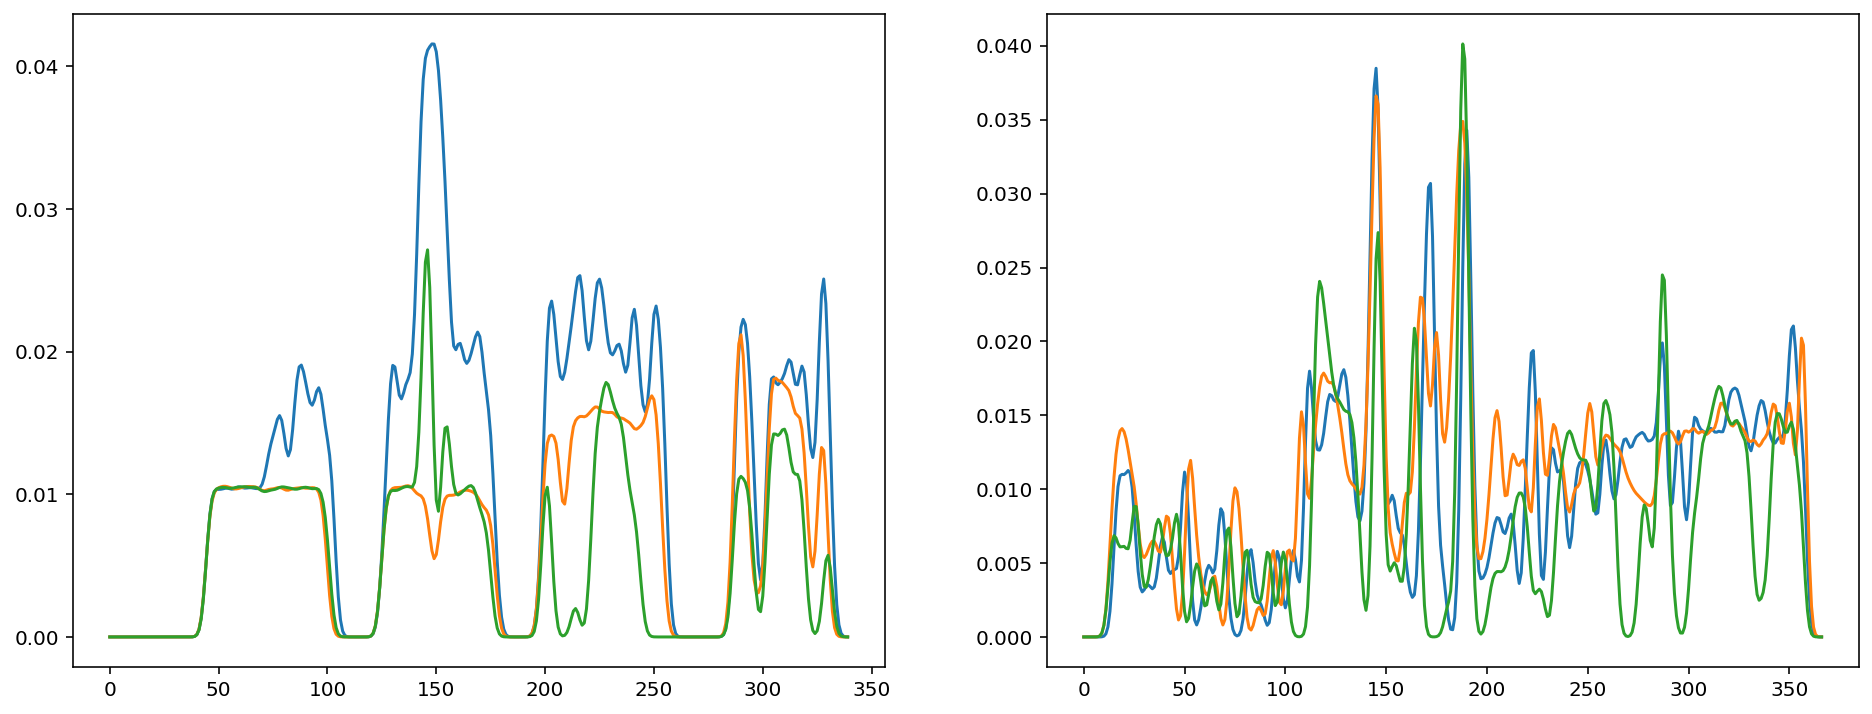

In [39]:
gr = '1011'
ss = [get_signals_for_group_session(all_ticks,gr, sess ,ngw) for sess in sessions]
plt.figure(figsize=(16,6))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(ss[i][:,::100].T)


In [229]:
def data_to_plotly_style(mat):
    data = []
    ll = mat.shape[1]
    for row in mat:
        data.append({'x': list(range(ll)), 'y': list(np.round(row,3)), 'type': 'scatter'})
    return data

In [230]:
ss = get_signals_for_group_session(all_ticks,'1009', 'Interaction' ,ngw)
data = data_to_plotly_style(np.vstack(ss)[:,::100]*1000)
np.set_printoptions(precision=2, suppress=True)
print(data)

[{'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [231]:
import json
with open('data.json','wt') as a:
    json.dump(data,a)

In [202]:
data.__repr__()

"[{'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

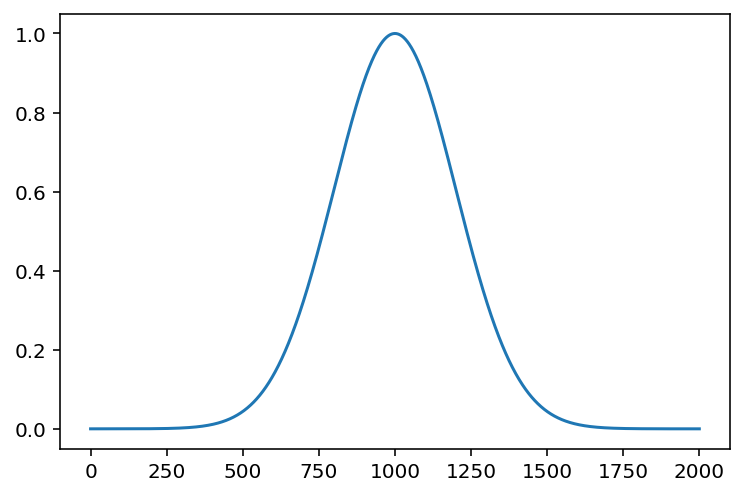

In [159]:
plt.plot(windows.gaussian(2001,200))


/home/siegman/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


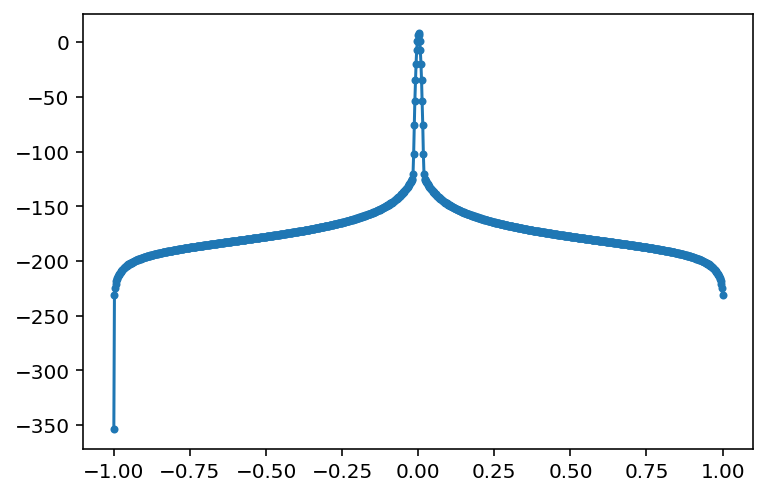

In [232]:
ln =1000
%matplotlib inline
plt.plot(np.linspace(-1, 1, ln),10*np.log10(fftshift(fft(windows.gaussian(ln,100)/100)**2)),'.-')

In [160]:
windows.gaussian(2001,200).sum()

501.32537122575167

In [205]:
print(sorted(set(k[0] for k in all_ticks.keys())))

['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '1050', '1051']


In [234]:
def export_graphs_to_js_object(all_ticks, groups=None, kernel=ngw):
    data_obj = {}
    for k, v in all_ticks:
        gr = k[0]
        if groups is not None and gr not in groups:
            continue
        data_obj[gr] = data_obj.get(gr,{})
        array = np.round(oaconvolve(to_dense(np.array(v)),ngw)*100[::100], 3)
        
        ss = get_signals_for_group_session(all_ticks,'1009', 'Interaction' ,ngw)
        data_obj_k2 = {'Freestyle': 'FS', 'Interaction': 'IN'}[k[1]] 
        data_obj[gr][data_obj_k2][k[2]] = {'x': list(range(len(array))), 'y':list(array), 'type': 'scatter'}
    return data_obj
        

In [ ]:
def write_data_file 